In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncode
%matplotlib inline

In [48]:
df = pd.read_csv('Forbes-Top2000-2017.csv')

In [49]:
df

,Unnamed: 0,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,NaN,1,ICBC,China,151.400,42.000,3473.2,229.800,Financials,Major Banks
1,NaN,2,China Construction Bank,China,134.200,35.000,3016.6,200.500,Financials,Regional Banks
2,NaN,3,Berkshire Hathaway,United States,222.900,24.100,620.9,409.900,Financials,Investment Services
3,NaN,4,JPMorgan Chase,United States,102.500,24.200,2513.0,306.600,Financials,Major Banks
4,NaN,5,Wells Fargo,United States,97.600,21.900,1943.4,274.400,Financials,Major Banks
...,...,...,...,...,...,...,...,...,...,...
1995,NaN,1996,BEKB-BCBE,Switzerland,0.555,0.131,27.9,1.700,Financials,Regional Banks
1996,NaN,1997,Fastighets Balder,Sweden,0.630,0.639,10.2,3.800,Materials,NaN
1997,NaN,1998,Akamai Technologies,United States,2.300,0.316,4.4,10.100,Information Technology,Computer Services
1998,NaN,1999,Oita Bank,Japan,0.523,0.071,27.9,0.595,Financials,Regional Banks


In [50]:
dfobj = list(columns for columns in df.select_dtypes([object]).columns)
le = LabelEncoder()
for features in dfobj:
    df[features] = le.fit_transform(df[features].astype(str))
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    0 non-null      float64
 1    Rank         2000 non-null   int64  
 2   Company       2000 non-null   int32  
 3   Country       2000 non-null   int32  
 4   Sales         2000 non-null   float64
 5   Profits       2000 non-null   float64
 6   Assets        2000 non-null   float64
 7   Market Value  2000 non-null   float64
 8   Sector        2000 non-null   int32  
 9   Industry      2000 non-null   int32  
dtypes: float64(5), int32(4), int64(1)
memory usage: 125.1 KB
None


In [51]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [52]:
df.drop('Company',axis=1,inplace=True)

In [53]:
df.isnull().sum()

 Rank           0
Country         0
Sales           0
Profits         0
Assets          0
Market Value    0
Sector          0
Industry        0
dtype: int64

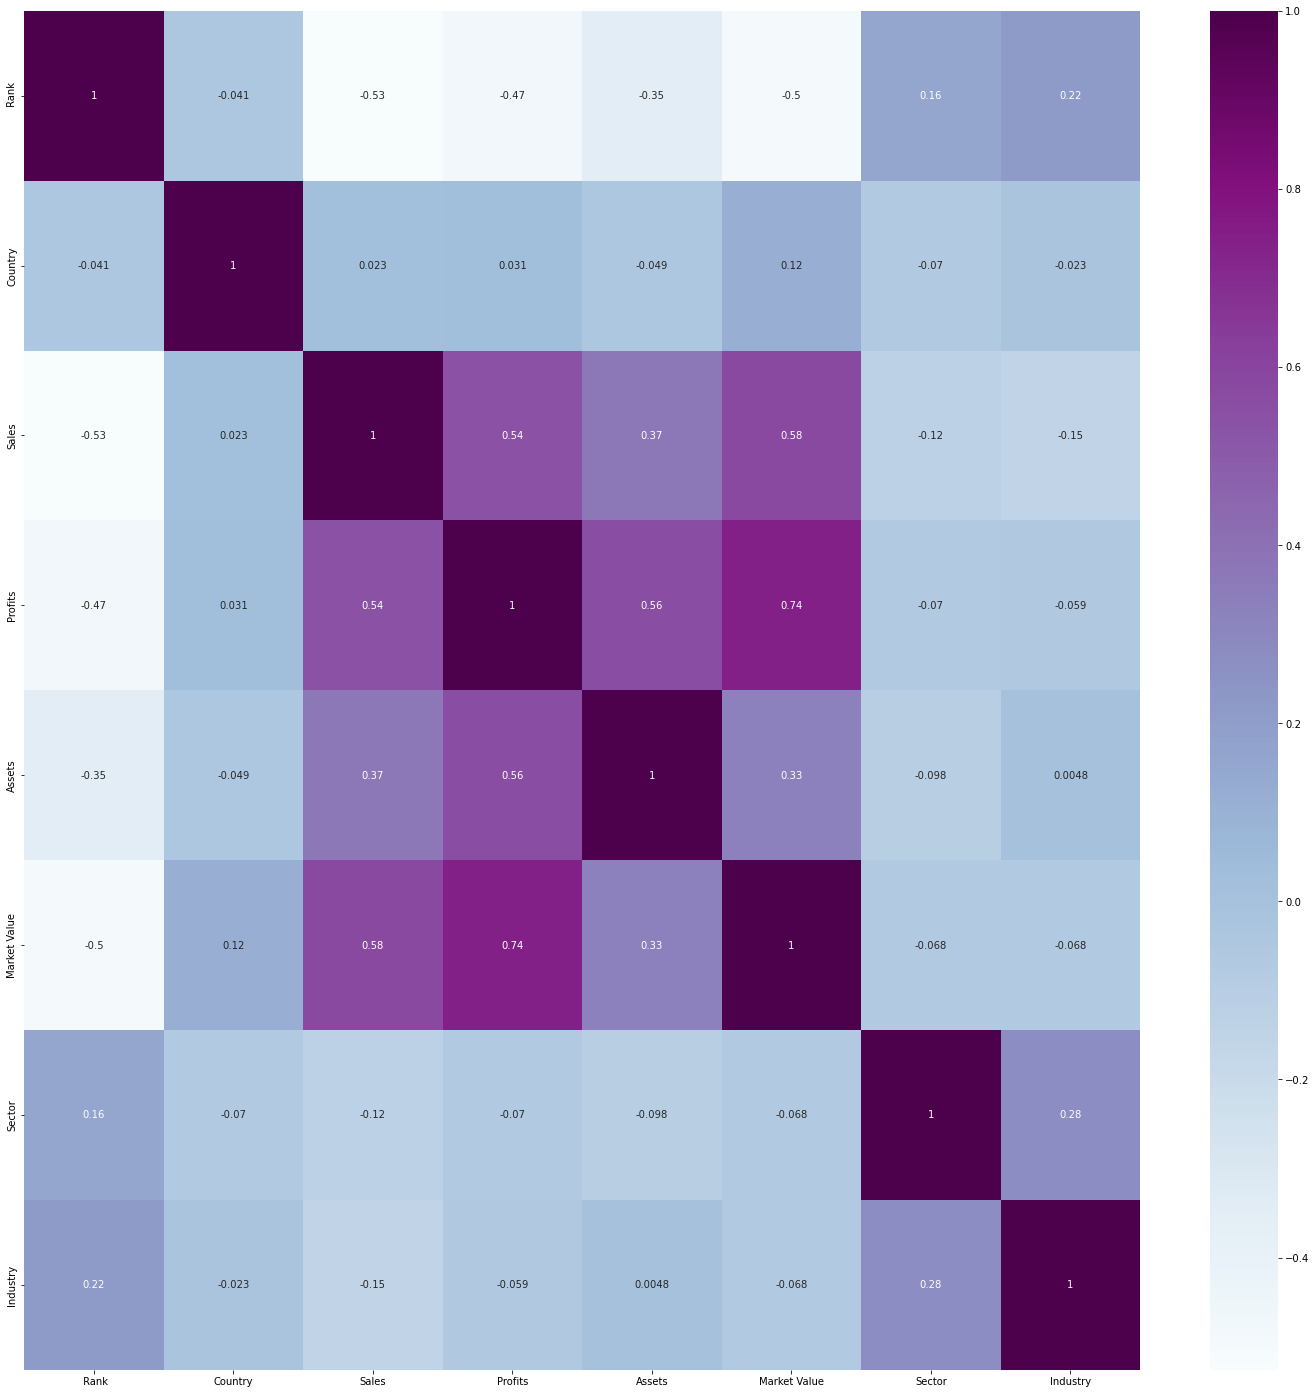

In [54]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),cmap="BuPu",annot=True)
plt.show()

In [55]:
df.shape

(2000, 8)

In [56]:
#first five rows of the Dataframe
df.head(100)

,Rank,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,9,151.4,42.0,3473.2,229.8,3,51
1,2,9,134.2,35.0,3016.6,200.5,3,67
2,3,58,222.9,24.1,620.9,409.9,3,48
3,4,58,102.5,24.2,2513.0,306.6,3,51
4,5,58,97.6,21.9,1943.4,274.4,3,51
...,...,...,...,...,...,...,...,...
95,96,58,22.0,5.9,451.0,86.6,3,51
96,97,58,34.0,5.4,158.9,70.1,3,24
97,98,53,135.2,4.6,80.4,54.4,6,35
98,99,24,75.9,2.8,164.1,47.5,9,33


In [57]:
df.isnull().sum()


 Rank           0
Country         0
Sales           0
Profits         0
Assets          0
Market Value    0
Sector          0
Industry        0
dtype: int64

In [58]:
C = df.corr()
C

,Rank,Country,Sales,Profits,Assets,Market Value,Sector,Industry
Rank,1.000000,-0.040755,-0.526051,-0.468487,-0.348387,-0.501322,0.157625,0.216888
Country,-0.040755,1.000000,0.023294,0.031300,-0.048505,0.117130,-0.070090,-0.023402
Sales,-0.526051,0.023294,1.000000,0.544257,0.373856,0.578612,-0.122057,-0.153266
Profits,-0.468487,0.031300,0.544257,1.000000,0.561030,0.741232,-0.069989,-0.058893
Assets,-0.348387,-0.048505,0.373856,0.561030,1.000000,0.328990,-0.097603,0.004809
Market Value,-0.501322,0.117130,0.578612,0.741232,0.328990,1.000000,-0.068269,-0.068473
Sector,0.157625,-0.070090,-0.122057,-0.069989,-0.097603,-0.068269,1.000000,0.276355
Industry,0.216888,-0.023402,-0.153266,-0.058893,0.004809,-0.068473,0.276355,1.000000


In [60]:
ct = list(columns for columns in df.select_dtypes([object]).columns)
le = LabelEncoder()
for features in ct:
    df[features] = le.fit_transform(df[features].astype(str))
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0    Rank         2000 non-null   int64  
 1   Country       2000 non-null   int32  
 2   Sales         2000 non-null   float64
 3   Profits       2000 non-null   float64
 4   Assets        2000 non-null   float64
 5   Market Value  2000 non-null   float64
 6   Sector        2000 non-null   int32  
 7   Industry      2000 non-null   int32  
dtypes: float64(4), int32(3), int64(1)
memory usage: 101.7 KB
None


In [61]:
df

,Rank,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,9,151.400,42.000,3473.2,229.800,3,51
1,2,9,134.200,35.000,3016.6,200.500,3,67
2,3,58,222.900,24.100,620.9,409.900,3,48
3,4,58,102.500,24.200,2513.0,306.600,3,51
4,5,58,97.600,21.900,1943.4,274.400,3,51
...,...,...,...,...,...,...,...,...
1995,1996,52,0.555,0.131,27.9,1.700,3,67
1996,1997,51,0.630,0.639,10.2,3.800,7,80
1997,1998,58,2.300,0.316,4.4,10.100,6,18
1998,1999,25,0.523,0.071,27.9,0.595,3,67


In [62]:
df1=df.drop(['Country'],axis=1)

In [135]:
#split dataset into X and Y variables ''
X =df[["Sector","Market Value"]]
y = df['Country']
df.iloc[:,4]

0       3473.2
1       3016.6
2        620.9
3       2513.0
4       1943.4
         ...  
1995      27.9
1996      10.2
1997       4.4
1998      27.9
1999       3.6
Name: Assets, Length: 2000, dtype: float64

In [138]:
#training the model

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 0)

In [139]:
x_train

,Sector,Market Value
1452,0,3.8
1044,6,21.8
1279,5,8.3
674,1,25.4
1200,7,10.4
...,...,...
835,3,16.0
1216,3,8.1
1653,10,9.6
559,3,14.3


In [141]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print(accuracy_score(y_pred, y_test))

0.3


In [142]:
tre = tree.DecisionTreeClassifier()  
tre.fit(x_train, y_train)
y_pred=tre.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.13666666666666666


In [150]:
tre = tree.DecisionTreeClassifier(max_leaf_nodes=10,min_samples_leaf=7)
tre.fit(x_train, y_train)
y_pred=tre.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.31333333333333335


In [151]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(tre,f)

In [145]:
y_pred = xgb.predict(x_test)
y_pred.shape

(300,)

In [146]:
clf=RandomForestClassifier(n_estimators=2) 
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=2)

In [147]:
y_pred=clf.predict(x_test)   # evaluating our model
print(accuracy_score(y_test, y_pred))

0.12333333333333334


In [149]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))


29.516379633462275